In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sln
%matplotlib inline

In [2]:
home_train=pd.read_csv("hometrain.csv")

In [26]:
home_train[['CentralAir','SalePrice']].groupby('CentralAir').mean()

,SalePrice
CentralAir,
N,105264.073684
Y,186186.709890


In [36]:
home_train['EnclosedPorch'].head(20)

0       0
1       0
2       0
3     272
4       0
5       0
6       0
7     228
8     205
9       0
10      0
11      0
12      0
13      0
14    176
15      0
16      0
17      0
18      0
19      0
Name: EnclosedPorch, dtype: int64

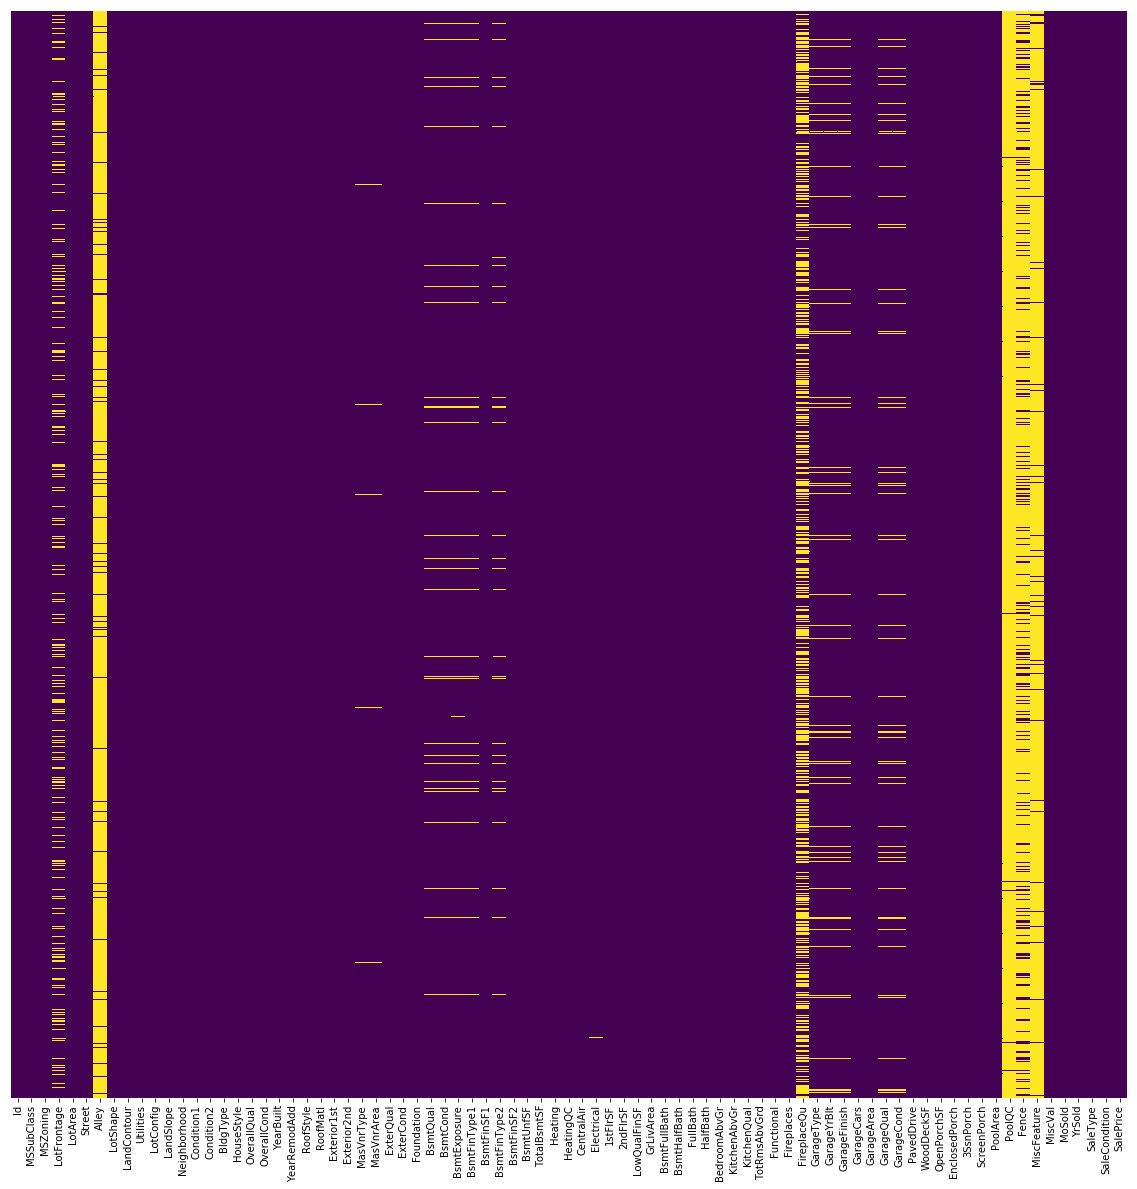

In [5]:
plt.figure(figsize=(20,20))
sln.heatmap(home_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
from sklearn.preprocessing import Imputer

In [9]:
my_imputer = Imputer()

In [12]:
data_with_imputed_values = my_imputer.fit_transform(home_train[['LotFrontage',''])

ValueError: Expected 2D array, got 1D array instead:
array=[ 65.  80.  68. ...,  66.  68.  75.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
new_data=pd.get_dummies(home_train[['Street','CentralAir']],drop_first=True)

In [40]:
final=pd.concat([home_train,new_data],axis=1)

In [41]:
final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,CentralAir_Y
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,1,1


In [43]:
X=final[['OverallQual','OverallCond','LotArea','Street_Pave','CentralAir_Y']] 

In [44]:
y=final['SalePrice']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [48]:
pip install xgboost


The following command must be run outside of the IPython shell:

    $ pip install xgboost

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [54]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
rfr=RandomForestRegressor(n_estimators=400)

In [95]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [96]:
predictions=rfr.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
mean_squared_error(y_test,predictions)

1650202254.5886452

In [99]:
home_test=pd.read_csv("home_test.csv")

In [100]:
new_data_test=pd.get_dummies(home_test[['Street','CentralAir']],drop_first=True)

In [101]:
final=pd.concat([home_test,new_data_test],axis=1)

In [102]:
home_test_X=final[['OverallQual','OverallCond','LotArea','Street_Pave','CentralAir_Y']]

In [103]:
predicted_prices = rfr.predict(home_test_X)

In [70]:
predicted_prices

array([ 140302.5,  154280. ,  146180. , ...,  181390. ,  124250. ,  185750. ])

In [71]:
my_submission = pd.DataFrame({'Id': home_test.Id, 'SalePrice': predicted_prices})

In [72]:
my_submission.to_csv('submission.csv', index=False)